In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/ML-Dataset.csv'
data = pd.read_csv(file_path)




In [ ]:
# Display the first few rows of the dataframe
print(data.head())



      RegionName               CountryName  State       City PostalCode  \
0  South America  United States of America  Texas  Southlake      26192   
1  South America  United States of America  Texas  Southlake      26192   
2  South America  United States of America  Texas  Southlake      26192   
3  South America  United States of America  Texas  Southlake      26192   
4  South America  United States of America  Texas  Southlake      26192   

      WarehouseAddress    WarehouseName    EmployeeName  \
0  2014 Jabberwocky Rd  Southlake Texas    Summer Payne   
1  2014 Jabberwocky Rd  Southlake Texas   Rose Stephens   
2  2014 Jabberwocky Rd  Southlake Texas  Annabelle Dunn   
3  2014 Jabberwocky Rd  Southlake Texas    Tommy Bailey   
4  2014 Jabberwocky Rd  Southlake Texas    Blake Cooper   

                EmployeeEmail  EmployeePhone  ...    CustomerName  \
0    summer.payne@example.com     5151238181  ...      Flor Stone   
1   rose.stephens@example.com     5151238080  ...  Laver

In [ ]:
# Display summary statistics
print(data.describe())



       EmployeePhone  ProductStandardCost       Profit  ProductListPrice  \
count   4.000000e+02           400.000000   400.000000        400.000000   
mean    1.300551e+12          1812.654525   189.743700       2002.398800   
std     3.546655e+12          4297.988742   254.318871       4432.591249   
min     1.856490e+07            12.630000     0.000000         15.550000   
25%     9.716165e+08           414.160000    59.972500        502.982500   
50%     1.168870e+10           698.320000   134.200000        849.990000   
75%     2.651186e+10          1671.950000   229.520000       1999.890000   
max     1.144164e+13         75410.000000  2770.000000      78180.000000   

       CustomerCreditLimit  CustomerPhone  OrderItemQuantity  PerUnitPrice  \
count           400.000000   4.000000e+02         400.000000    400.000000   
mean           2033.617500   6.422348e+10          89.240000    839.253100   
std            1534.488065   1.871854e+11          34.064253    706.449917   
min

In [ ]:
# Check for missing values
print(data.isnull().sum())

RegionName             0
CountryName            0
State                  0
City                   0
PostalCode             0
WarehouseAddress       0
WarehouseName          0
EmployeeName           0
EmployeeEmail          0
EmployeePhone          0
EmployeeHireDate       0
EmployeeJobTitle       0
CategoryName           0
ProductName            0
ProductDescription     0
ProductStandardCost    0
Profit                 0
ProductListPrice       0
CustomerName           0
CustomerAddress        0
CustomerCreditLimit    0
CustomerEmail          0
CustomerPhone          0
Status                 0
OrderDate              0
OrderItemQuantity      0
PerUnitPrice           0
TotalItemQuantity      0
dtype: int64


**Step 2: Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



# Check data types
print("Data Types before conversion:")
print(data.dtypes)

# Convert date fields to datetime
if 'date_column' in data.columns:  # Replace 'date_column' with the actual name of your date column
    data['date_column'] = pd.to_datetime(data['date_column'])

# Handling missing values
# Impute missing values with median for numeric columns
imputer = SimpleImputer(strategy='median')
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = imputer.fit_transform(data[[col]])

# Check for remaining missing values
print("Missing values after imputation:")
print(data.isnull().sum())

# Handling outliers (Example: Capping and flooring)
# Assuming 'sales' is a column that might have outliers
if 'sales' in data.columns:
    sales_Q1 = data['sales'].quantile(0.25)
    sales_Q3 = data['sales'].quantile(0.75)
    IQR = sales_Q3 - sales_Q1
    lower_bound = sales_Q1 - 1.5 * IQR
    upper_bound = sales_Q3 + 1.5 * IQR
    data['sales'] = data['sales'].clip(lower_bound, upper_bound)

# Normalizing/Standardizing data
scaler = StandardScaler()
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = scaler.fit_transform(data[[col]])




Data Types before conversion:
RegionName              object
CountryName             object
State                   object
City                    object
PostalCode              object
WarehouseAddress        object
WarehouseName           object
EmployeeName            object
EmployeeEmail           object
EmployeePhone            int64
EmployeeHireDate        object
EmployeeJobTitle        object
CategoryName            object
ProductName             object
ProductDescription      object
ProductStandardCost    float64
Profit                 float64
ProductListPrice       float64
CustomerName            object
CustomerAddress         object
CustomerCreditLimit      int64
CustomerEmail           object
CustomerPhone            int64
Status                  object
OrderDate               object
OrderItemQuantity        int64
PerUnitPrice           float64
TotalItemQuantity        int64
dtype: object
Missing values after imputation:
RegionName             0
CountryName            0
State

In [ ]:
# Check the first few rows to see the transformations
print(data.head())

      RegionName               CountryName  State       City PostalCode  \
0  South America  United States of America  Texas  Southlake      26192   
1  South America  United States of America  Texas  Southlake      26192   
2  South America  United States of America  Texas  Southlake      26192   
3  South America  United States of America  Texas  Southlake      26192   
4  South America  United States of America  Texas  Southlake      26192   

      WarehouseAddress    WarehouseName    EmployeeName  \
0  2014 Jabberwocky Rd  Southlake Texas    Summer Payne   
1  2014 Jabberwocky Rd  Southlake Texas   Rose Stephens   
2  2014 Jabberwocky Rd  Southlake Texas  Annabelle Dunn   
3  2014 Jabberwocky Rd  Southlake Texas    Tommy Bailey   
4  2014 Jabberwocky Rd  Southlake Texas    Blake Cooper   

                EmployeeEmail  EmployeePhone  ...    CustomerName  \
0    summer.payne@example.com      -0.365703  ...      Flor Stone   
1   rose.stephens@example.com      -0.365703  ...  Laver

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Summary statistics
print(data.describe())





       EmployeePhone  ProductStandardCost        Profit  ProductListPrice  \
count   4.000000e+02         4.000000e+02  4.000000e+02        400.000000   
mean   -1.776357e-17         1.776357e-17 -8.881784e-17          0.000000   
std     1.001252e+00         1.001252e+00  1.001252e+00          1.001252   
min    -3.671519e-01        -4.193307e-01 -7.470202e-01         -0.448798   
25%    -3.668828e-01        -3.257910e-01 -5.109087e-01         -0.338694   
50%    -3.638573e-01        -2.595935e-01 -2.186753e-01         -0.260311   
75%    -3.596726e-01        -3.277829e-02  1.565991e-01         -0.000567   
max     2.862921e+00         1.714512e+01  1.015846e+01         17.207317   

       CustomerCreditLimit  CustomerPhone  OrderItemQuantity  PerUnitPrice  \
count         4.000000e+02   4.000000e+02       4.000000e+02  4.000000e+02   
mean         -7.105427e-17   1.776357e-17       1.465494e-16 -1.554312e-17   
std           1.001252e+00   1.001252e+00       1.001252e+00  1.001252e+

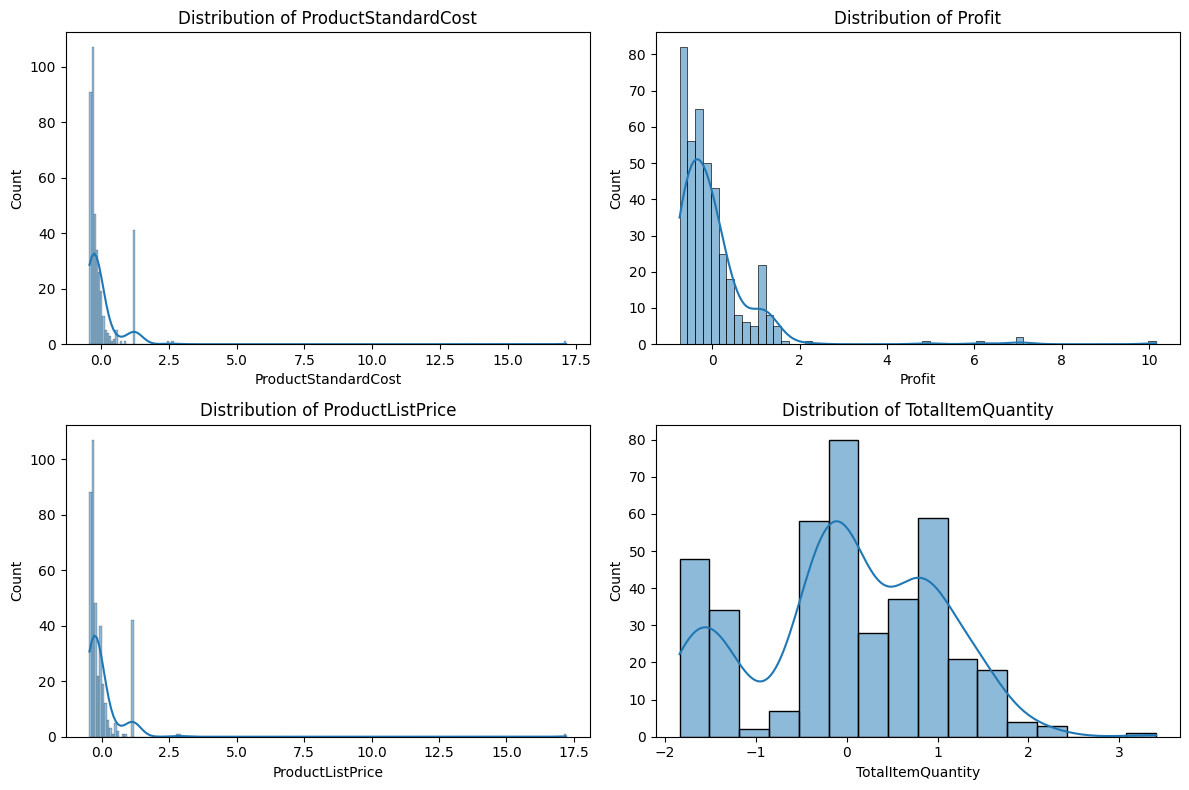

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with standardized values
# Histograms for select features
features = ['ProductStandardCost', 'Profit', 'ProductListPrice', 'TotalItemQuantity']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

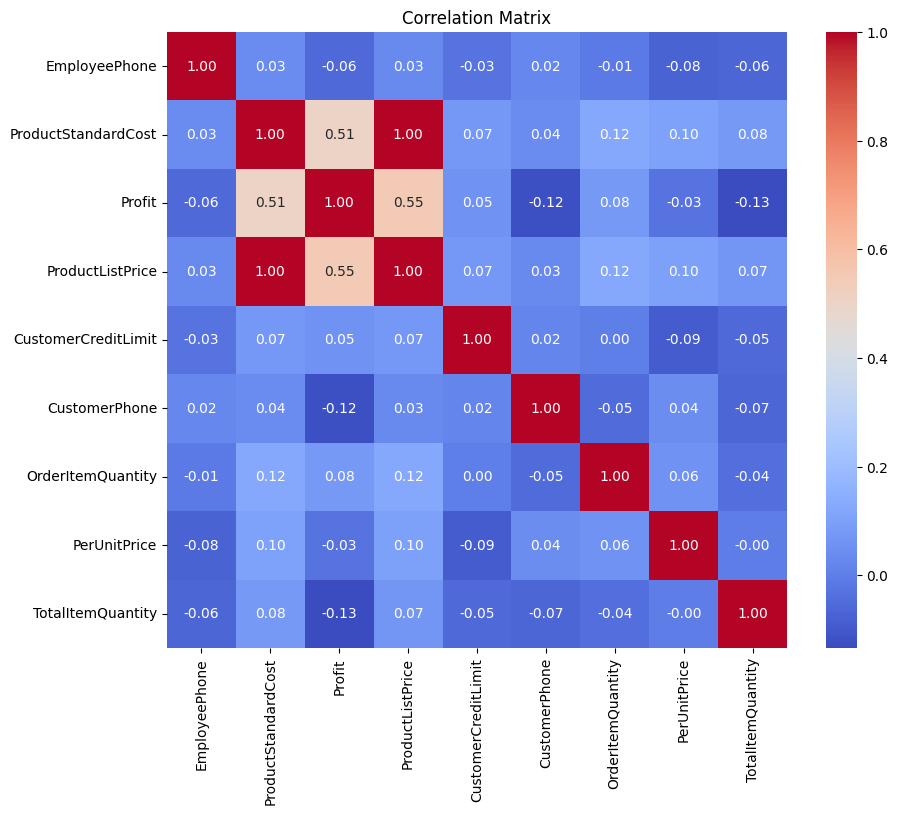

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Ensure you are only selecting numerical columns for correlation
numerical_data = data.select_dtypes(include=[np.number])  # This selects only numerical columns

# Correlation matrix of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

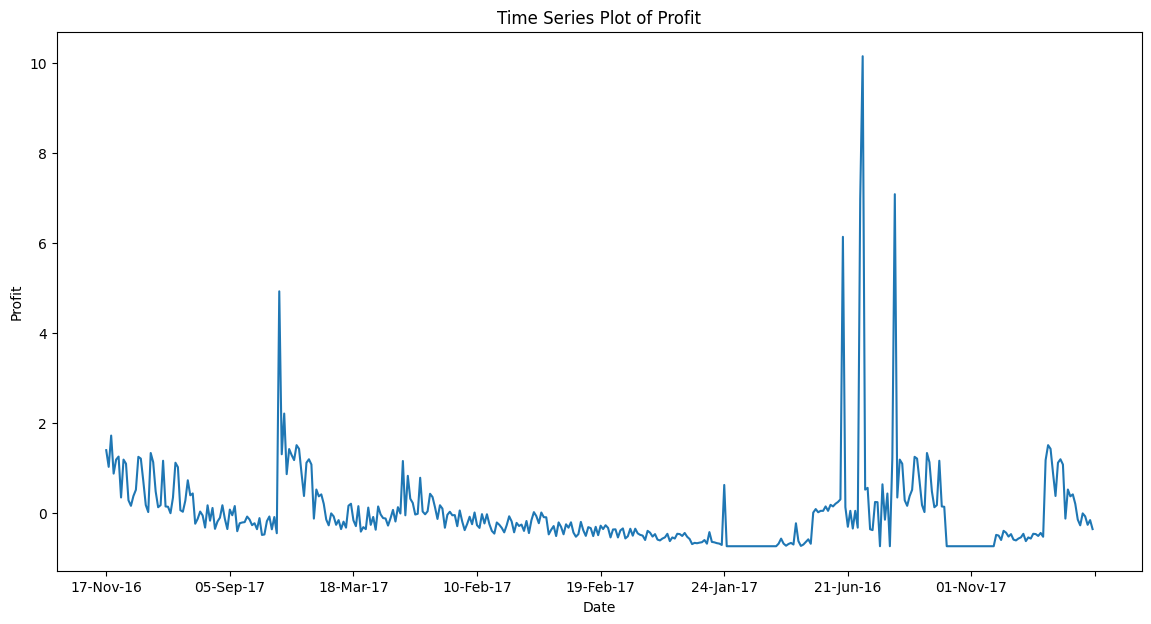

In [ ]:
# Assuming 'OrderDate' is your date column and is already in datetime format
if 'OrderDate' in data.columns:
    data.set_index('OrderDate', inplace=True)
    data['Profit'].plot(figsize=(14, 7))
    plt.title('Time Series Plot of Profit')
    plt.ylabel('Profit')
    plt.xlabel('Date')
    plt.show()



<ipython-input-60-0dea3f5d4067>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Profit'], shade=True)


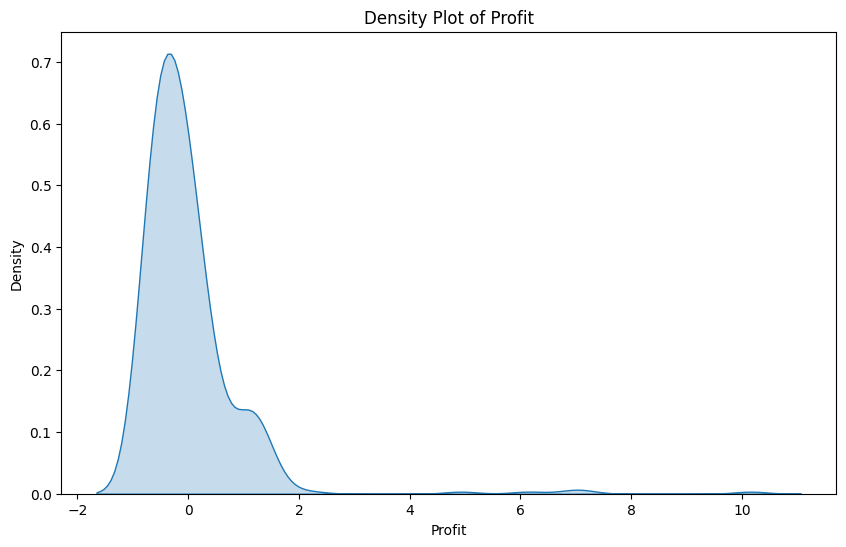

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Profit'], shade=True)
plt.title('Density Plot of Profit')
plt.xlabel('Profit')
plt.show()




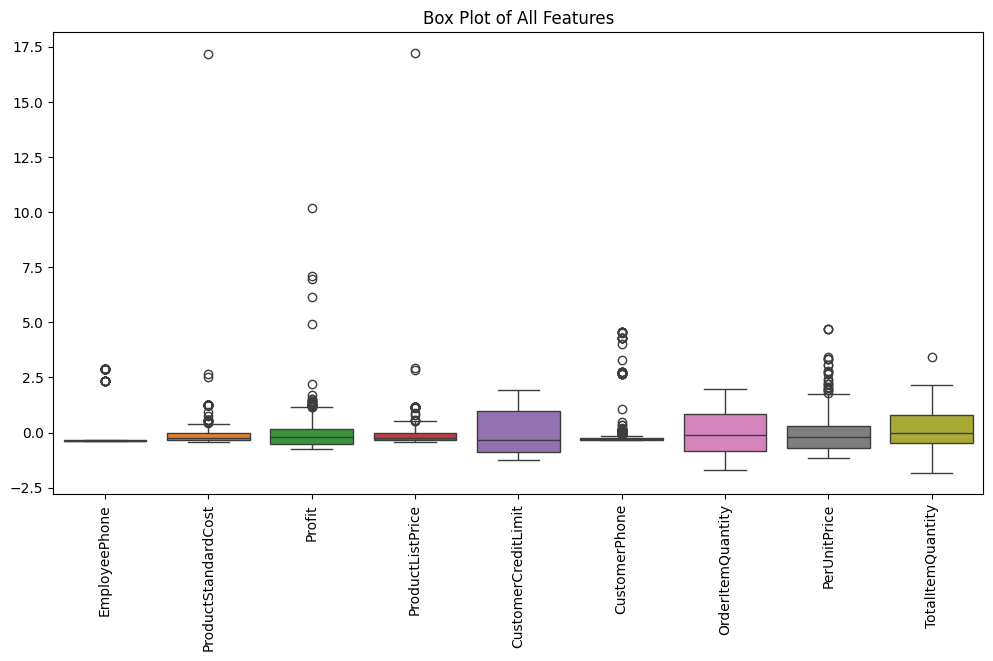

In [ ]:

# Box Plots for all features
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Box Plot of All Features')
plt.show()



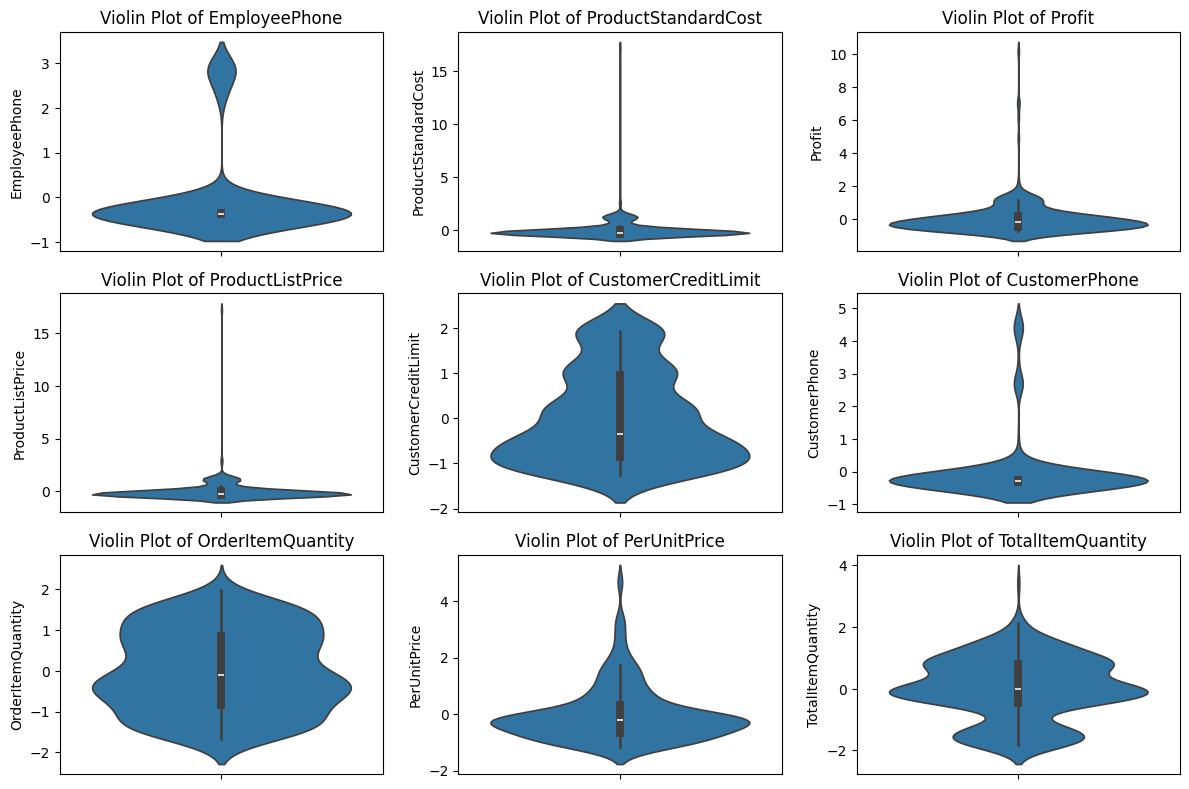

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# 1. Violin Plots for all numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, i + 1)  # Adjust grid dimensions based on the number of columns
    sns.violinplot(y=data[col])
    plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler









Categorical Columns: Index(['RegionName', 'CountryName', 'State', 'City', 'PostalCode',
       'WarehouseAddress', 'WarehouseName', 'EmployeeName', 'EmployeeEmail',
       'EmployeeHireDate', 'EmployeeJobTitle', 'CategoryName', 'ProductName',
       'ProductDescription', 'CustomerName', 'CustomerAddress',
       'CustomerEmail', 'Status'],
      dtype='object')


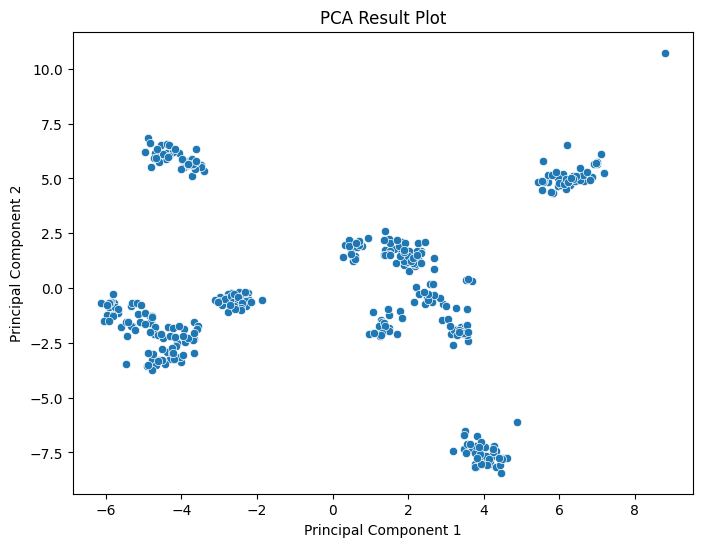

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# One-Hot Encode categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Ensure no missing values
data_encoded = data_encoded.fillna(0)

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Performing PCA
pca = PCA(n_components=2)  # Adjust components based on the dataset
pca_results = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])

# Plotting PCA Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Result Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()




Original Categorical Columns: Index(['RegionName', 'CountryName', 'State', 'City', 'PostalCode',
       'WarehouseAddress', 'WarehouseName', 'EmployeeName', 'EmployeeEmail',
       'EmployeeHireDate', 'EmployeeJobTitle', 'CategoryName', 'ProductName',
       'ProductDescription', 'CustomerName', 'CustomerAddress',
       'CustomerEmail', 'Status'],
      dtype='object')
Filtered Categorical Columns: ['RegionName', 'CountryName', 'State', 'City', 'PostalCode', 'WarehouseAddress', 'WarehouseName', 'Status']


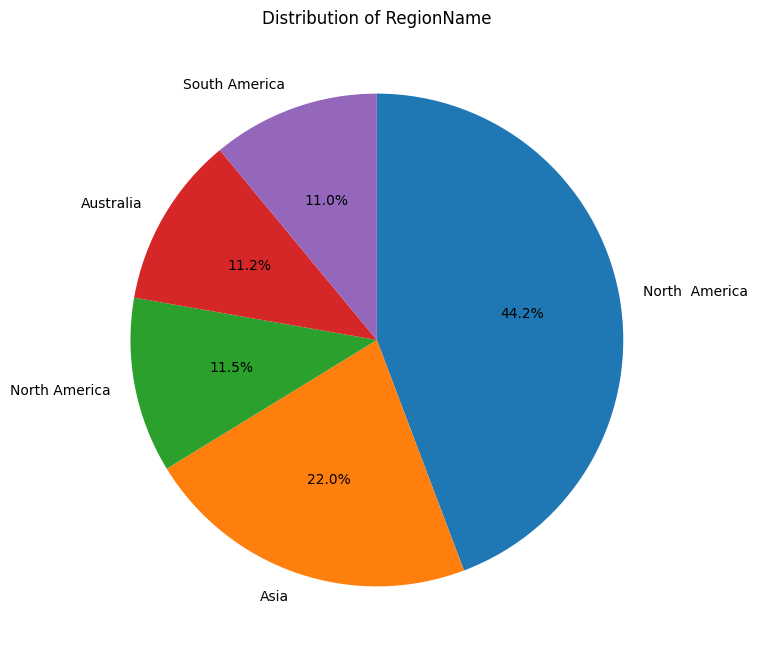

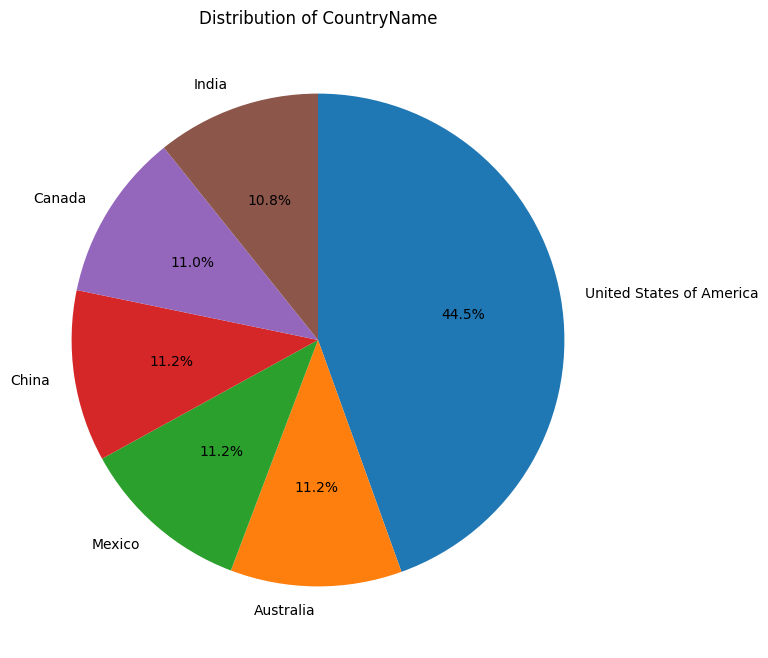

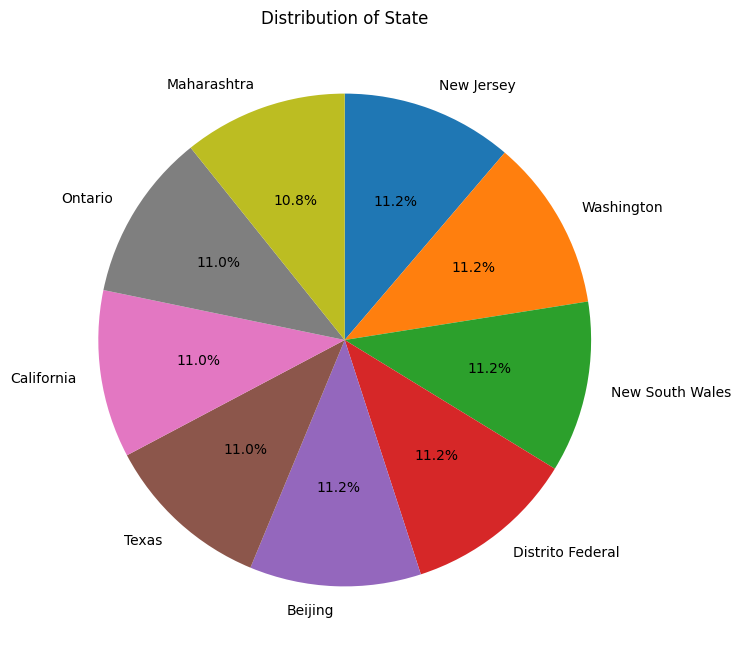

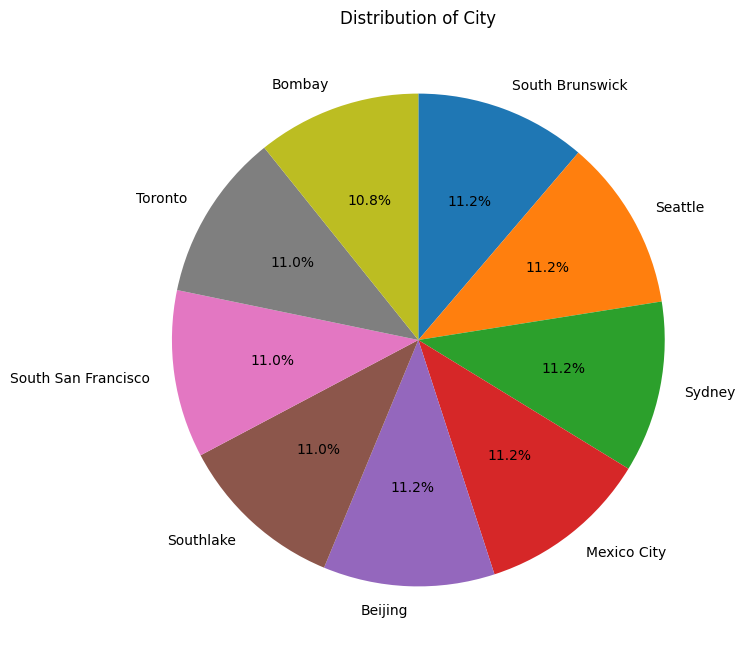

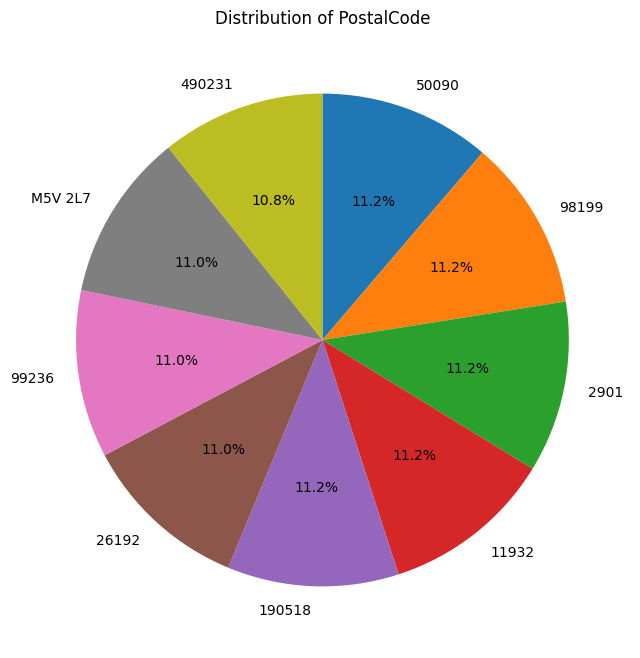

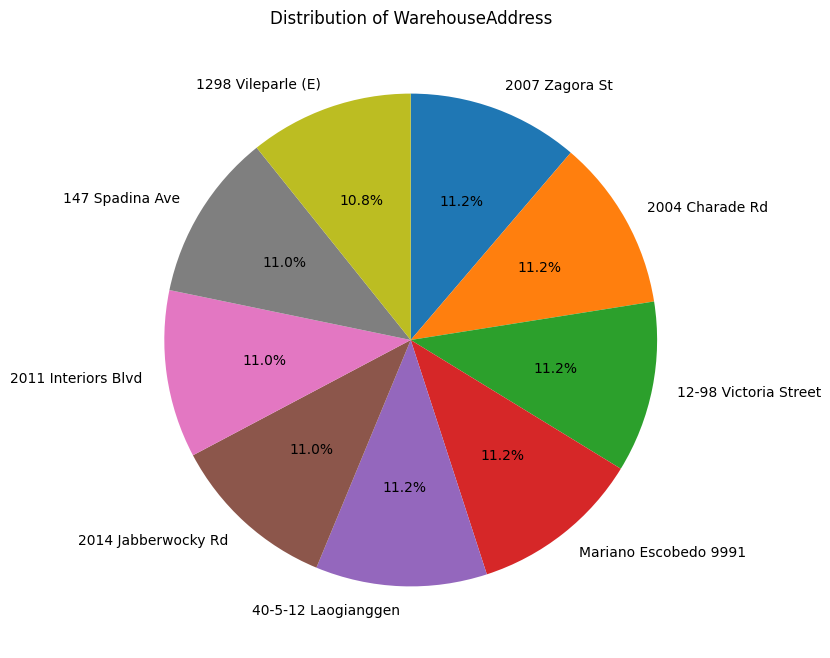

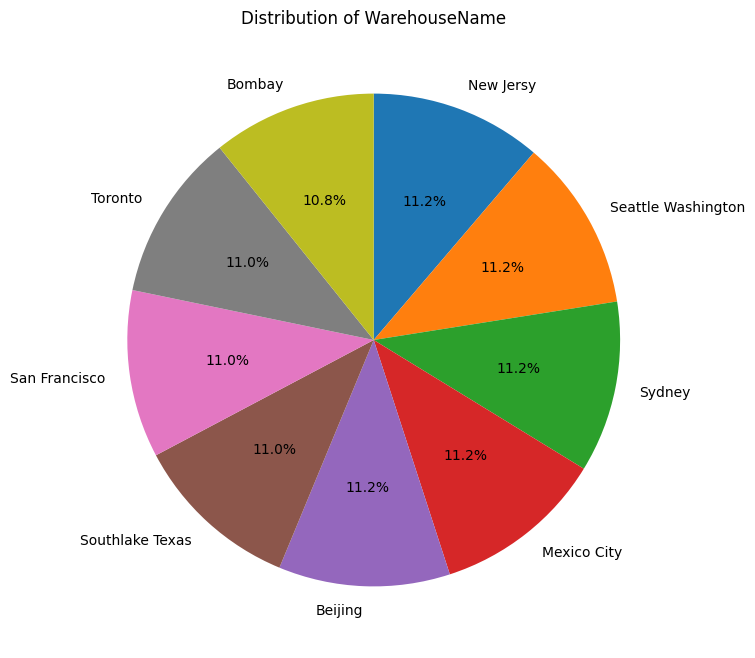

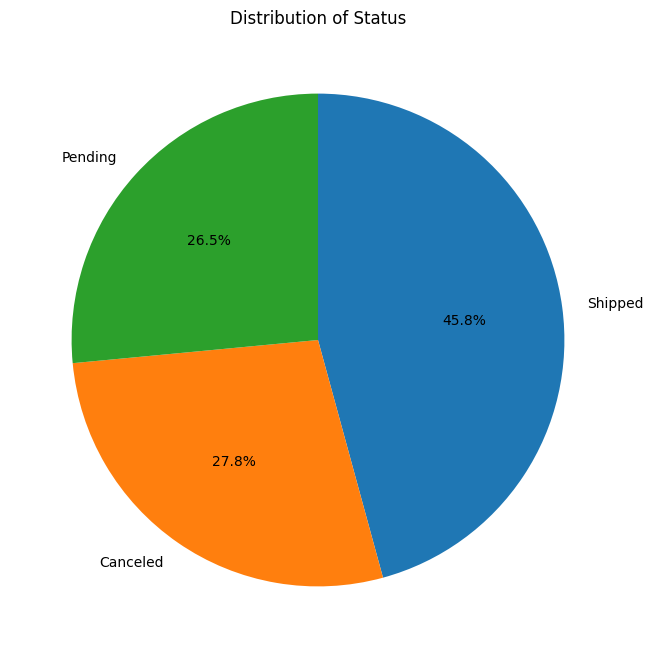

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Original Categorical Columns:", categorical_columns)

# Columns to remove from the pie chart generation
columns_to_remove = ['EmployeeName', 'EmployeeEmail', 'EmployeeHireDate',
                     'EmployeeJobTitle', 'CategoryName', 'ProductName',
                     'ProductDescription', 'CustomerName', 'CustomerAddress',
                     'CustomerEmail','OrderDate']

# Filter out the specified columns
filtered_categorical_columns = [col for col in categorical_columns if col not in columns_to_remove]
print("Filtered Categorical Columns:", filtered_categorical_columns)

# Create pie charts for each filtered categorical column
for column in filtered_categorical_columns:
    pie_data = data[column].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(f'Distribution of {column}')
    plt.show()



**feature engeering**

In [ ]:
import pandas as pd



# Generate time-based features from 'OrderDate' if it exists
if 'OrderDate' in data.columns:
    data['OrderDate'] = pd.to_datetime(data['OrderDate'])
    data['OrderYear'] = data['OrderDate'].dt.year
    data['OrderMonth'] = data['OrderDate'].dt.month
    data['OrderDay'] = data['OrderDate'].dt.day
    data['OrderDayOfWeek'] = data['OrderDate'].dt.dayofweek
    data['OrderWeekOfYear'] = data['OrderDate'].dt.isocalendar().week

    # Print the new columns *inside* the if block
    print("Time-based features added:")
    print(data[['OrderYear', 'OrderMonth', 'OrderDay', 'OrderDayOfWeek', 'OrderWeekOfYear']].head())


In [ ]:
# Identify categorical columns to encode (excluding previously specified ones)
columns_to_remove = ['EmployeeName', 'EmployeeEmail', 'EmployeeHireDate',
                     'EmployeeJobTitle', 'CategoryName', 'ProductName',
                     'ProductDescription', 'CustomerName', 'CustomerAddress',
                     'CustomerEmail']

categorical_columns = [col for col in data.select_dtypes(include=['object']).columns if col not in columns_to_remove]

# One-hot encode the remaining categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print("Categorical columns encoded. New columns added:")
print(data_encoded.head())


Categorical columns encoded. New columns added:
             EmployeeName               EmployeeEmail  EmployeePhone  \
OrderDate                                                              
17-Nov-16    Summer Payne    summer.payne@example.com      -0.365703   
20-Feb-17   Rose Stephens   rose.stephens@example.com      -0.365703   
03-Jan-17  Annabelle Dunn  annabelle.dunn@example.com      -0.365703   
15-Oct-17    Tommy Bailey    tommy.bailey@example.com      -0.365703   
09-Apr-17    Blake Cooper    blake.cooper@example.com      -0.365703   

          EmployeeHireDate               EmployeeJobTitle CategoryName  \
OrderDate                                                                
17-Nov-16        07-Jun-16              Public Accountant          CPU   
20-Feb-17        07-Jun-16             Accounting Manager          CPU   
03-Jan-17        17-Sep-16       Administration Assistant          CPU   
15-Oct-17        17-Jun-16                      President          CPU   
09-

In [ ]:
# Example: Aggregate total sales per product
if 'ProductName' in data.columns and 'OrderItemQuantity' in data.columns:
    total_sales_per_product = data.groupby('ProductName')['OrderItemQuantity'].sum().reset_index()
    total_sales_per_product.rename(columns={'OrderItemQuantity': 'TotalSales'}, inplace=True)
    data = data.merge(total_sales_per_product, on='ProductName', how='left')

print("Aggregated total sales per product:")
print(data[['ProductName', 'TotalSales']].drop_duplicates().head())


Aggregated total sales per product:
                        ProductName  TotalSales
0  Intel Xeon E5-2699 V3 (OEM/Tray)    1.256847
1             Intel Xeon E5-2697 V3    1.021702
2  Intel Xeon E5-2698 V3 (OEM/Tray)    0.081125
3             Intel Xeon E5-2697 V4    1.139275
4  Intel Xeon E5-2685 V3 (OEM/Tray)    0.492628


In [ ]:
# Example: Interaction feature between ProductStandardCost and ProductListPrice
if 'ProductStandardCost' in data.columns and 'ProductListPrice' in data.columns:
    data['CostPriceInteraction'] = data['ProductStandardCost'] * data['ProductListPrice']

print("Interaction feature added:")
print(data[['ProductStandardCost', 'ProductListPrice', 'CostPriceInteraction']].head())


Interaction feature added:
   ProductStandardCost  ProductListPrice  CostPriceInteraction
0             0.245737          0.318059              0.078159
1             0.119651          0.174514              0.020881
2             0.051839          0.148704              0.007709
3             0.077283          0.124822              0.009647
4             0.046465          0.112782              0.005240


**model building and evalution**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np



# Remove unnecessary columns (such as 'OrderDate', 'ProductName', etc.)
columns_to_remove = ['EmployeeName', 'EmployeeEmail', 'EmployeeHireDate',
                     'EmployeeJobTitle', 'CategoryName', 'ProductName',
                     'ProductDescription', 'CustomerName', 'CustomerAddress',
                     'CustomerEmail', 'OrderDate']

data = data.drop(columns=columns_to_remove, errors='ignore')

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Assume 'OrderItemQuantity' is the target variable for demand forecasting
target = 'OrderItemQuantity'

# Split data into features (X) and target (y)
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_state=42)
}

# Train and evaluate models
results = []

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display results
print(results_df)




                      Model       MAE       MSE      RMSE        R2
0         Linear Regression  0.736148  0.843909  0.918645  0.287653
1             Decision Tree  0.615784  0.735979  0.857892  0.378757
2             Random Forest  0.560867  0.555054  0.745020  0.531476
3         Gradient Boosting  0.582135  0.578544  0.760621  0.511648
4  Support Vector Regressor  0.771963  0.815205  0.902887  0.311882
5       K-Nearest Neighbors  0.914124  1.101294  1.049425  0.070393
6                   XGBoost  0.606892  0.642224  0.801389  0.457896


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


Fine-Tuned Model Performance:
MAE: 0.5421758682367541
MSE: 0.5537295262180646
RMSE: 0.744130046576581
R²: 0.5325946122309926


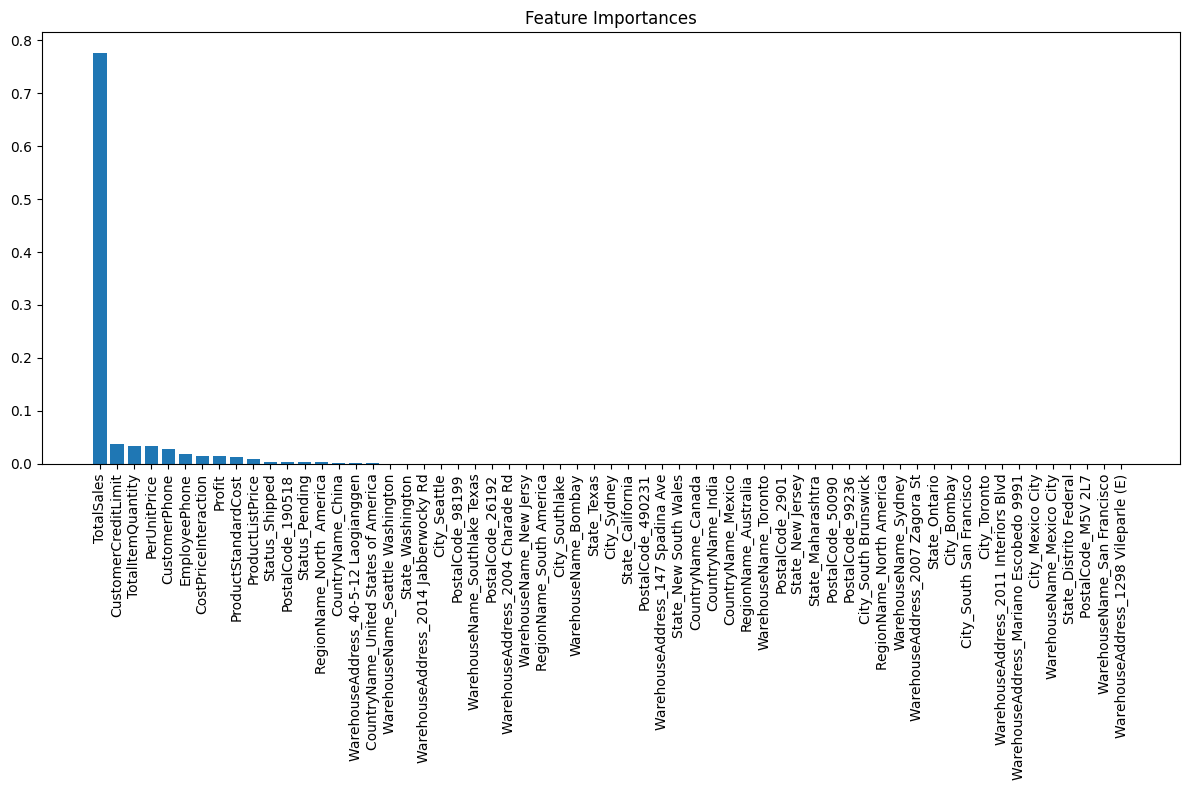

In [ ]:
# Train the RandomForestRegressor with the best parameters
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Fine-Tuned Model Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Plot feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


Fine-Tuned Model Performance:
MAE: 0.5421758682367541
MSE: 0.5537295262180646
RMSE: 0.744130046576581
R²: 0.5325946122309926


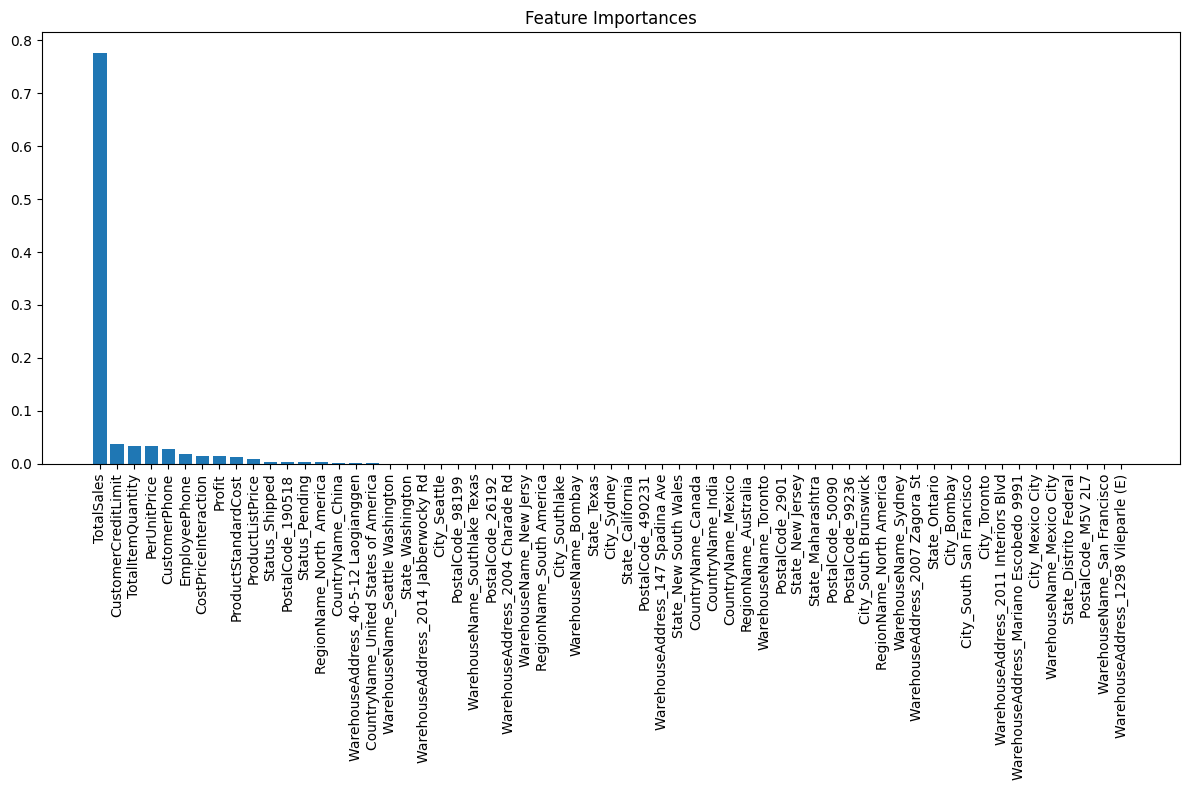

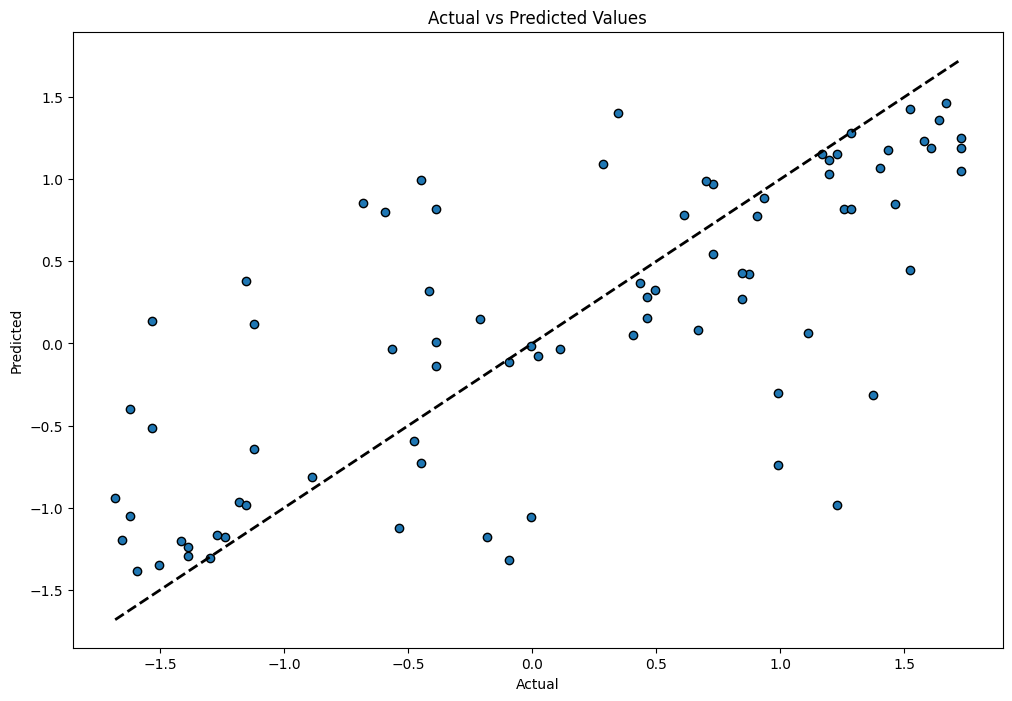

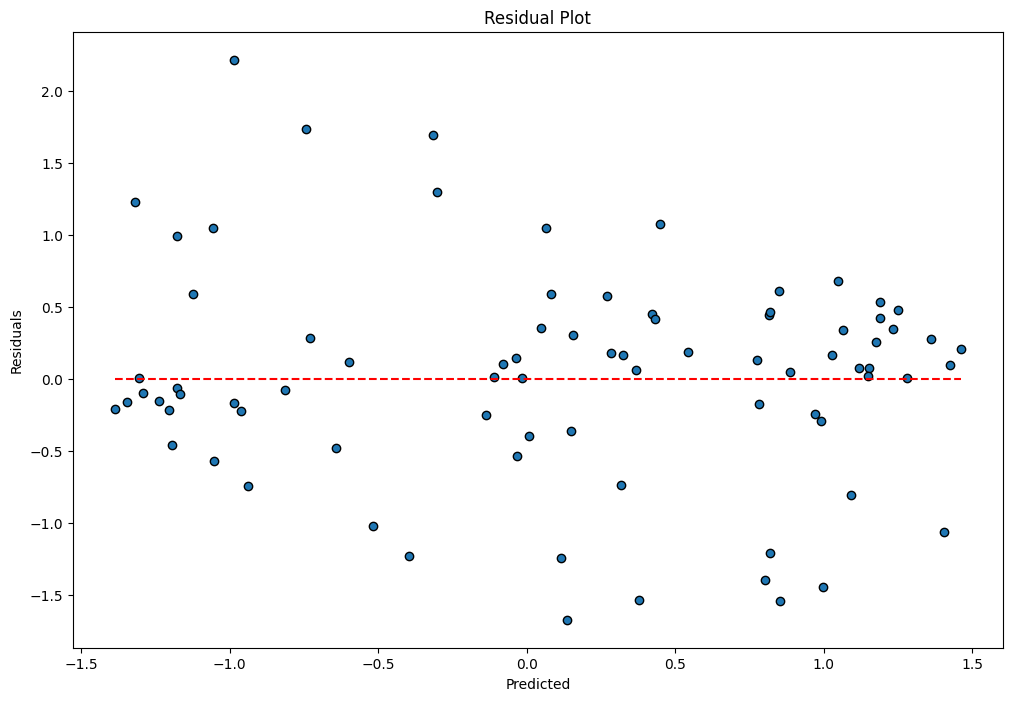

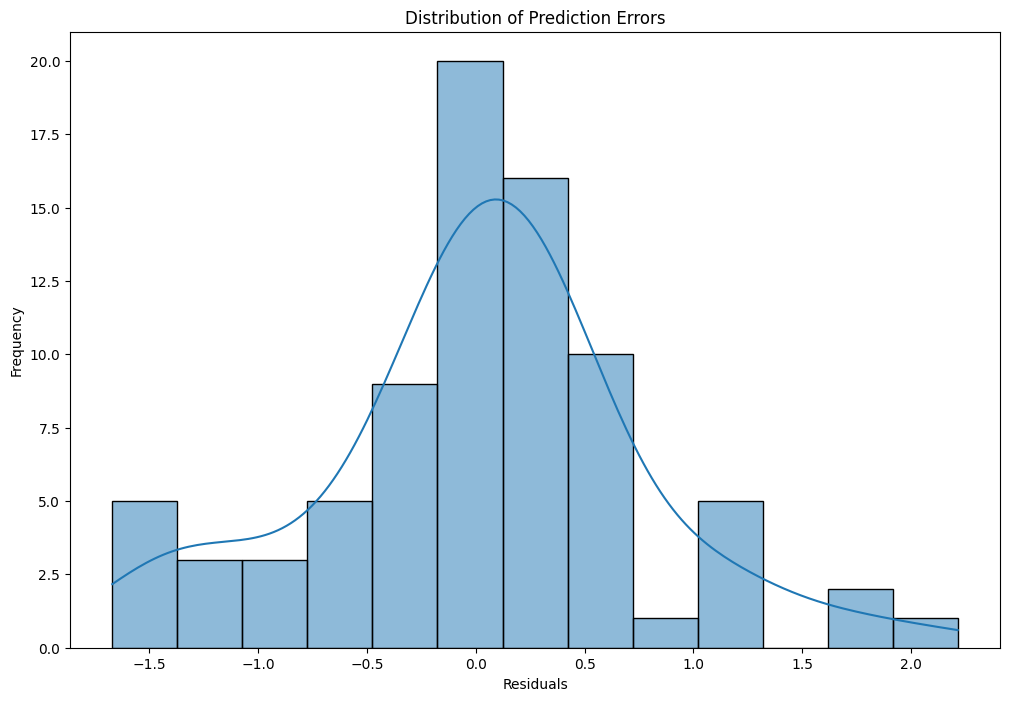

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set using the best model
y_pred = best_rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Fine-Tuned Model Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# 1. Feature Importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# 2. Actual vs. Predicted Values
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 3. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 4. Distribution of Errors
plt.figure(figsize=(12, 8))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


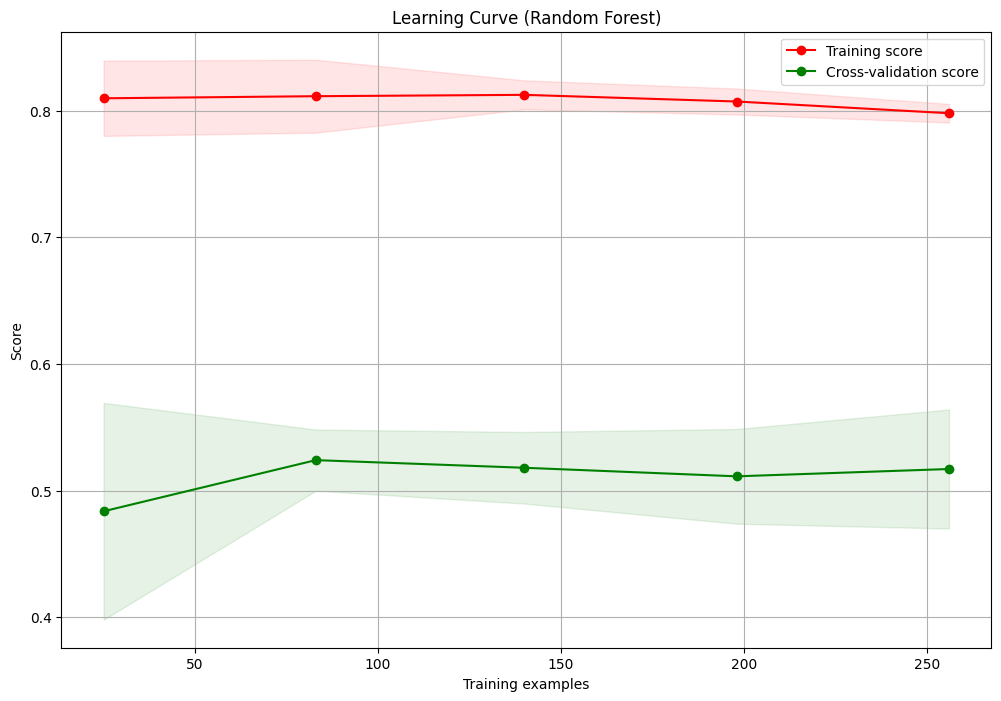

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(12, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for the best model
plot_learning_curve(best_rf, 'Learning Curve (Random Forest)', X_train, y_train, cv=5, n_jobs=-1)
plt.show()



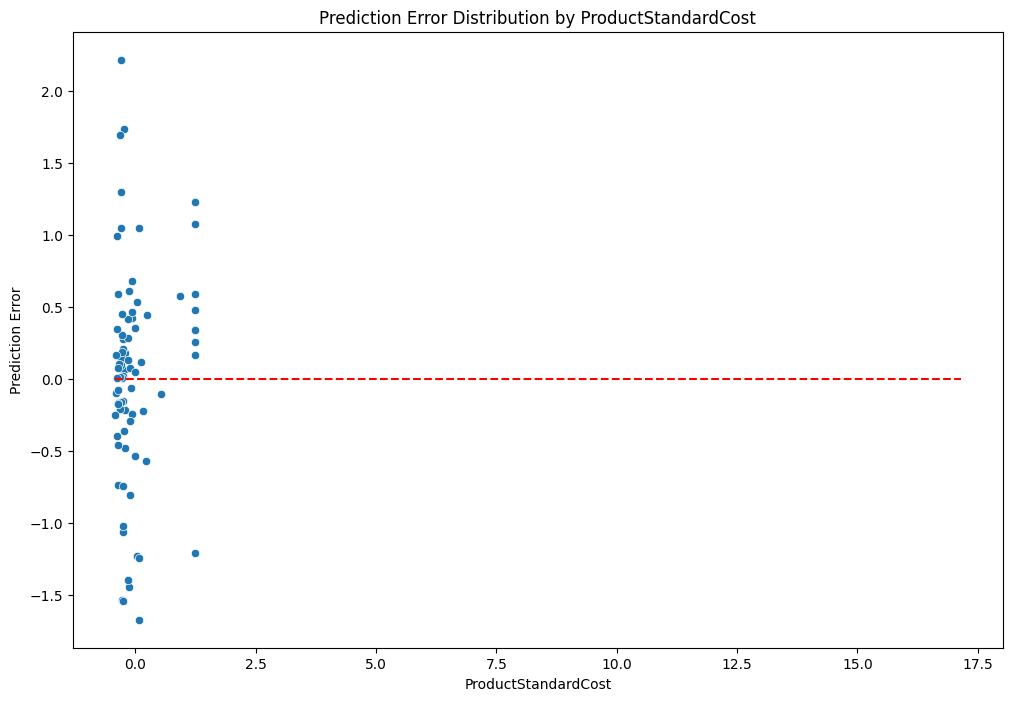

In [ ]:
feature = 'ProductStandardCost'  # Replace with the feature you are interested in
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data[feature], y=(y_test - y_pred))
plt.hlines(y=0, xmin=data[feature].min(), xmax=data[feature].max(), colors='r', linestyles='dashed')
plt.xlabel(feature)
plt.ylabel('Prediction Error')
plt.title(f'Prediction Error Distribution by {feature}')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

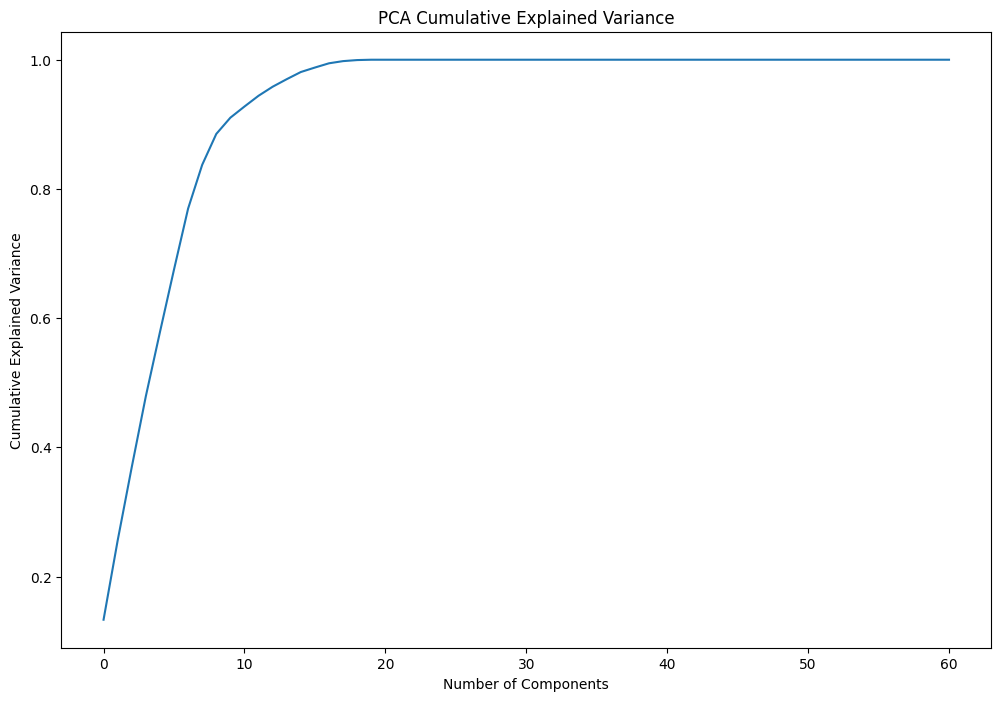

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA().fit(X_train)

# Plot explained variance
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.show


                      Model       MAE       MSE      RMSE        R2
0         Linear Regression  0.736148  0.843909  0.918645  0.287653
1             Decision Tree  0.615784  0.735979  0.857892  0.378757
2             Random Forest  0.560867  0.555054  0.745020  0.531476
3         Gradient Boosting  0.582135  0.578544  0.760621  0.511648
4  Support Vector Regressor  0.771963  0.815205  0.902887  0.311882
5       K-Nearest Neighbors  0.914124  1.101294  1.049425  0.070393
6                   XGBoost  0.606892  0.642224  0.801389  0.457896


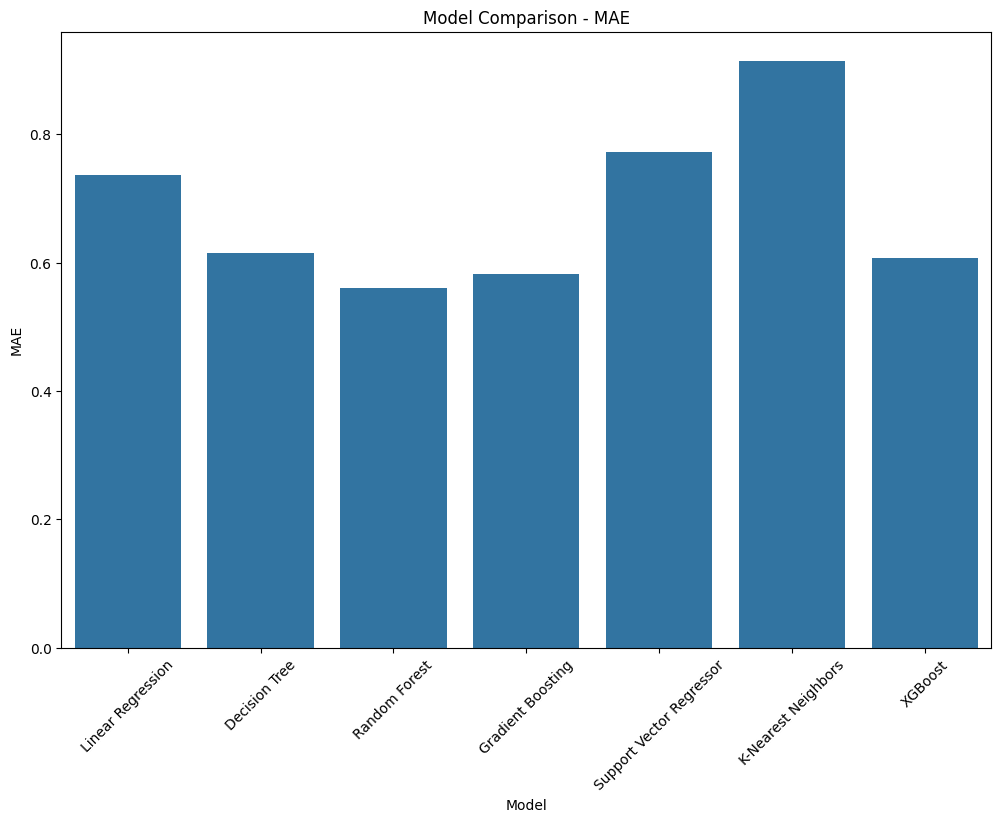

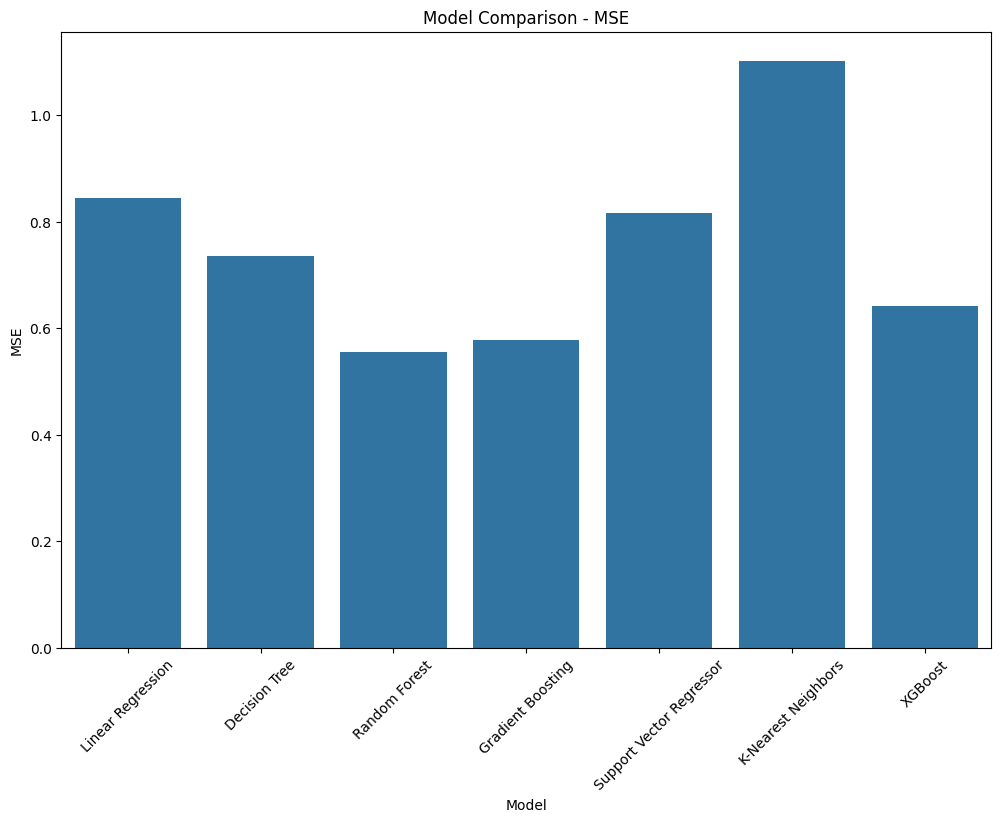

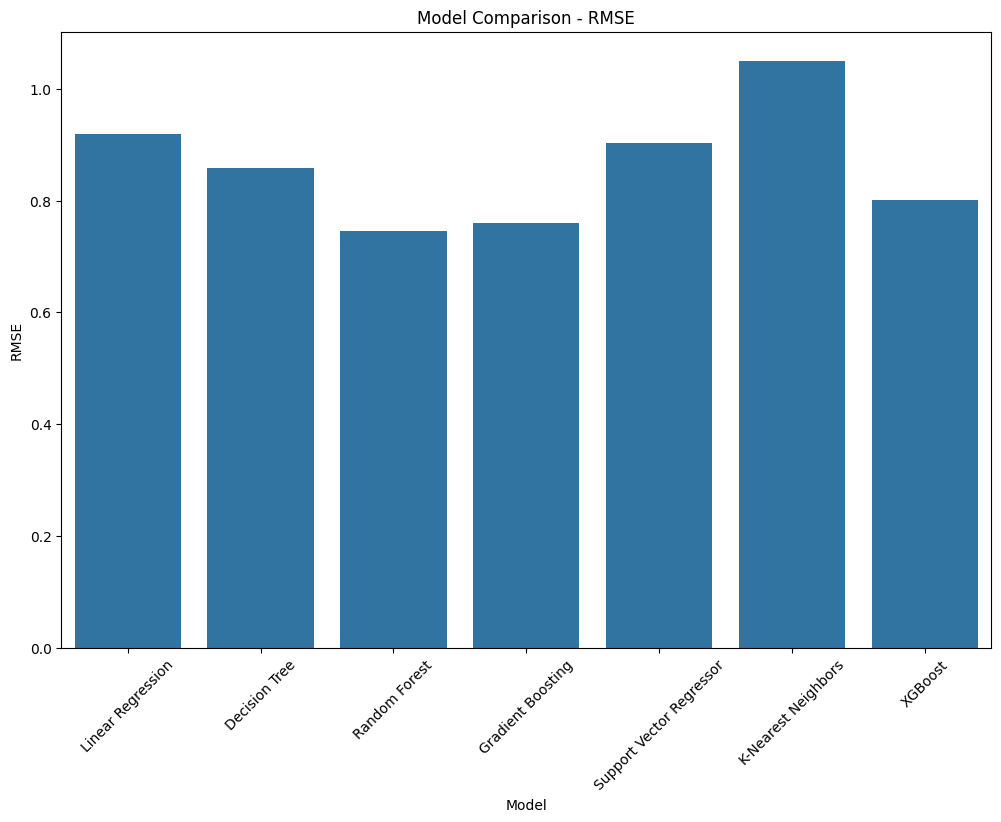

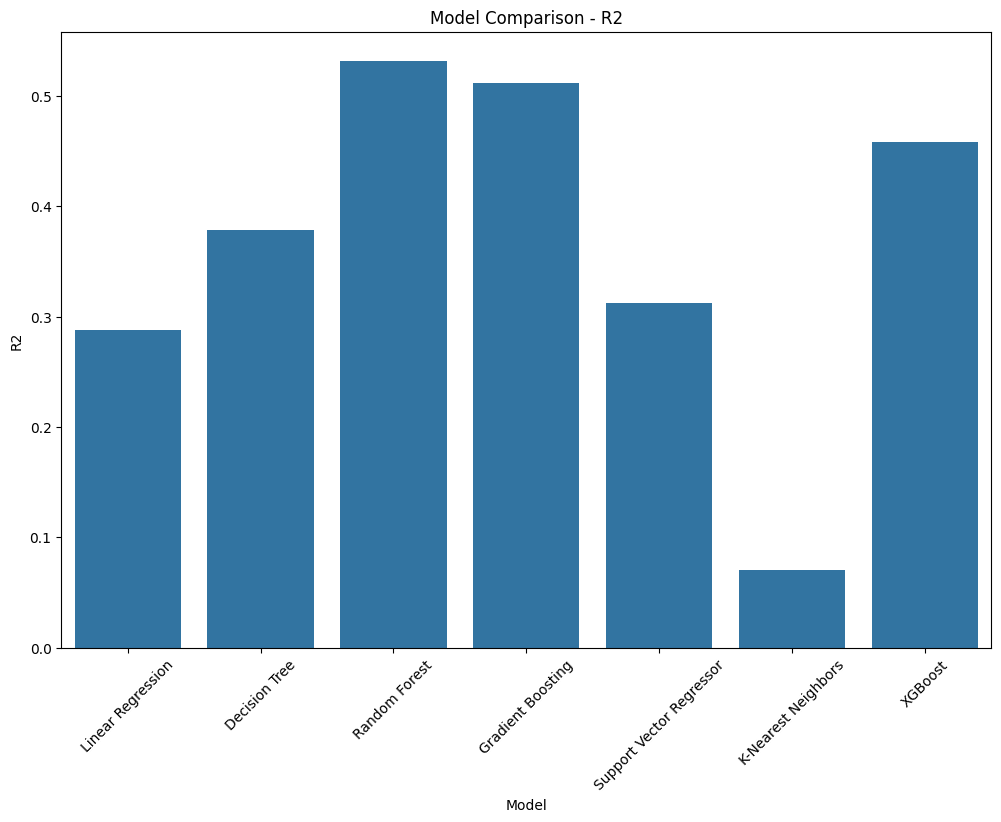

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Train and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})

results_df = pd.DataFrame(results)

# Display results
print(results_df)

# Visualize the results using bar plots
metrics = ['MAE', 'MSE', 'RMSE', 'R2']

for metric in metrics:
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Model Comparison - {metric}')
    plt.xticks(rotation=45)
    plt.show()


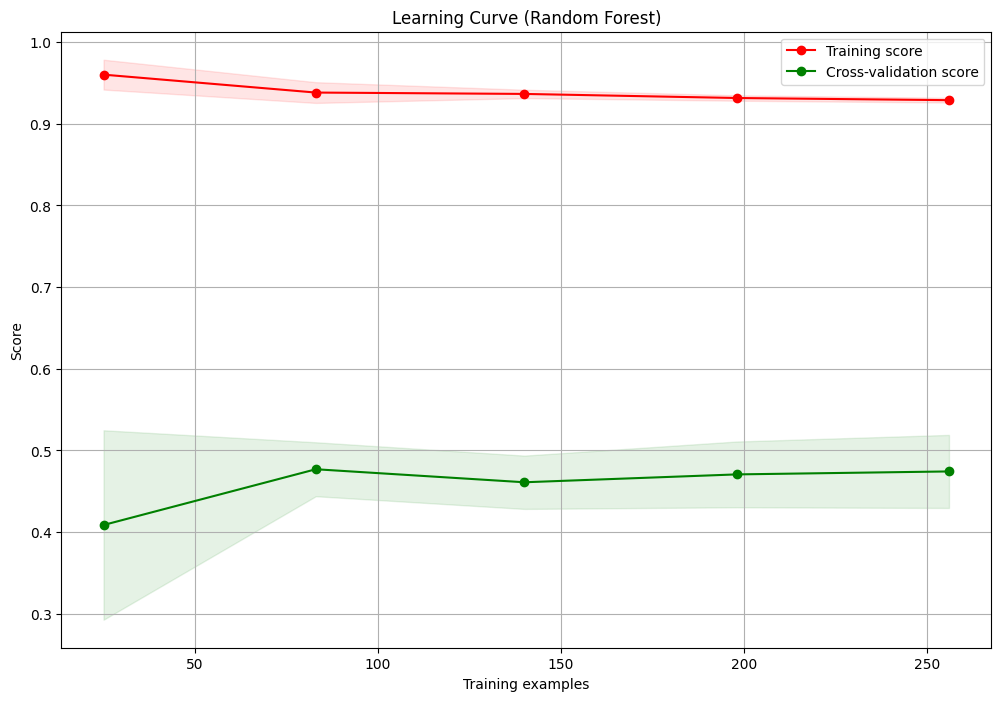

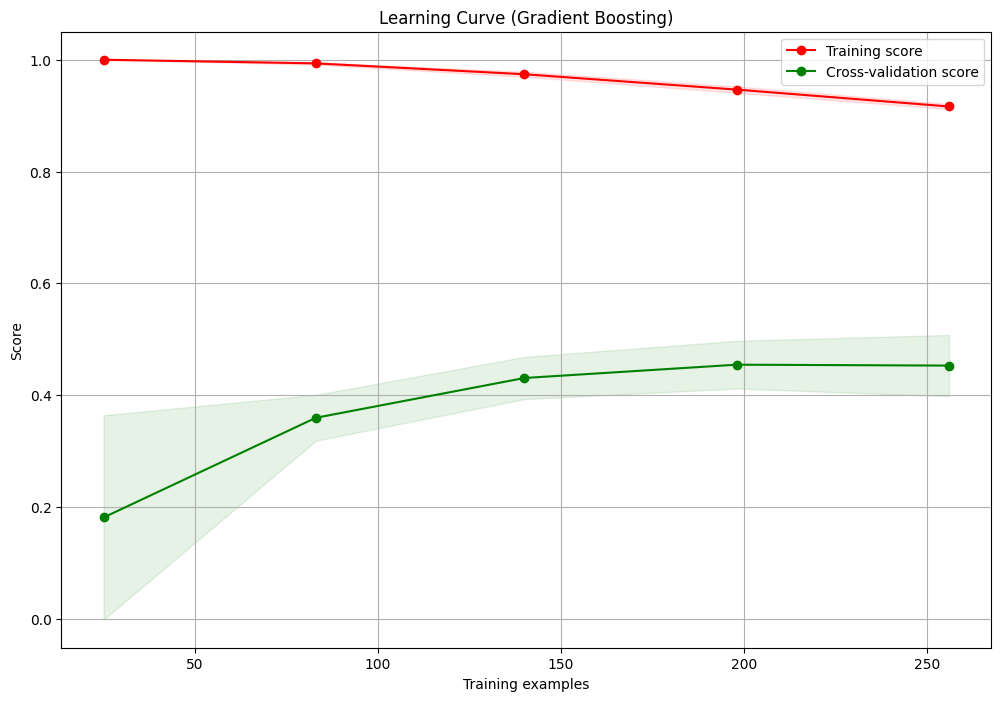

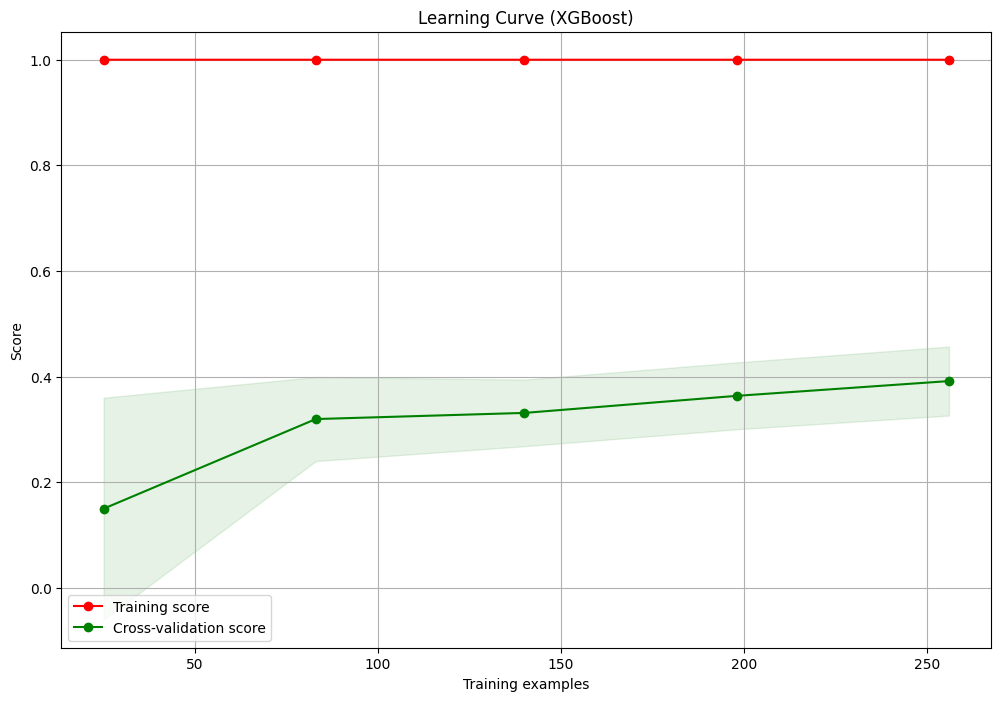

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(12, 8))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves for the top models
top_models = ['Random Forest', 'Gradient Boosting', 'XGBoost']

for model_name in top_models:
    plot_learning_curve(models[model_name], f'Learning Curve ({model_name})', X_train, y_train, cv=5, n_jobs=-1)
    plt.show()


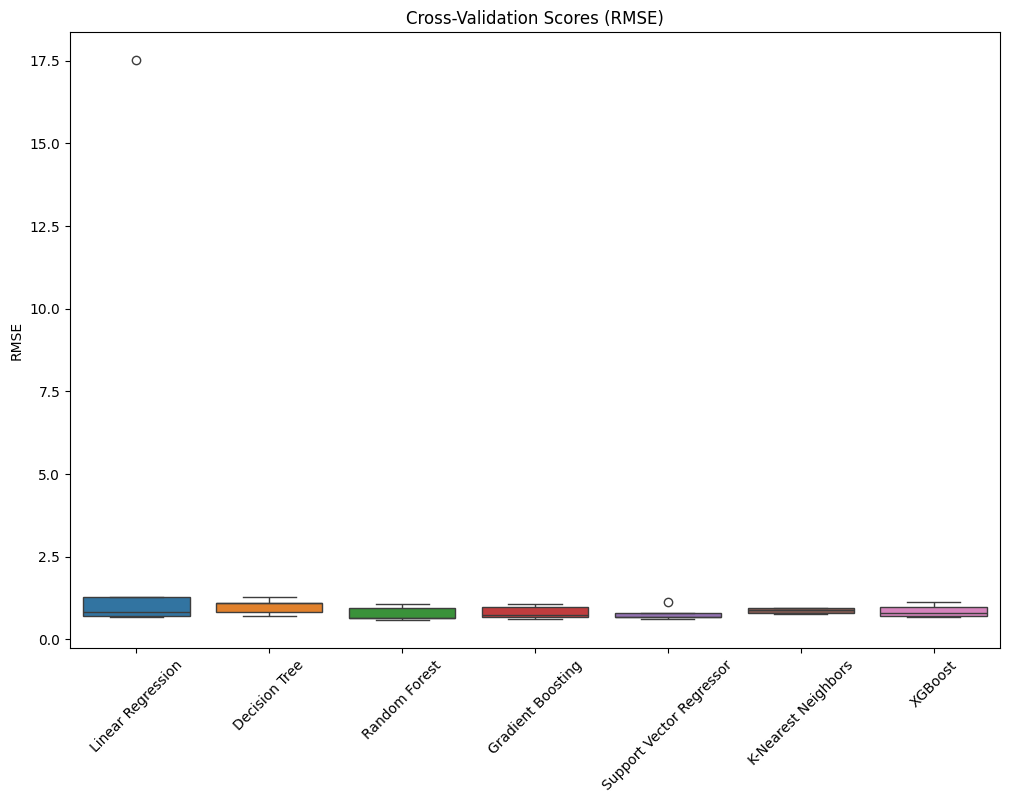

In [ ]:
from sklearn.model_selection import cross_val_score

cv_results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_results[name] = np.sqrt(-cv_scores)

# Convert to DataFrame
cv_df = pd.DataFrame(cv_results)

# Plot box plots of cross-validation scores
plt.figure(figsize=(12, 8))
sns.boxplot(data=cv_df)
plt.title('Cross-Validation Scores (RMSE)')
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.show()


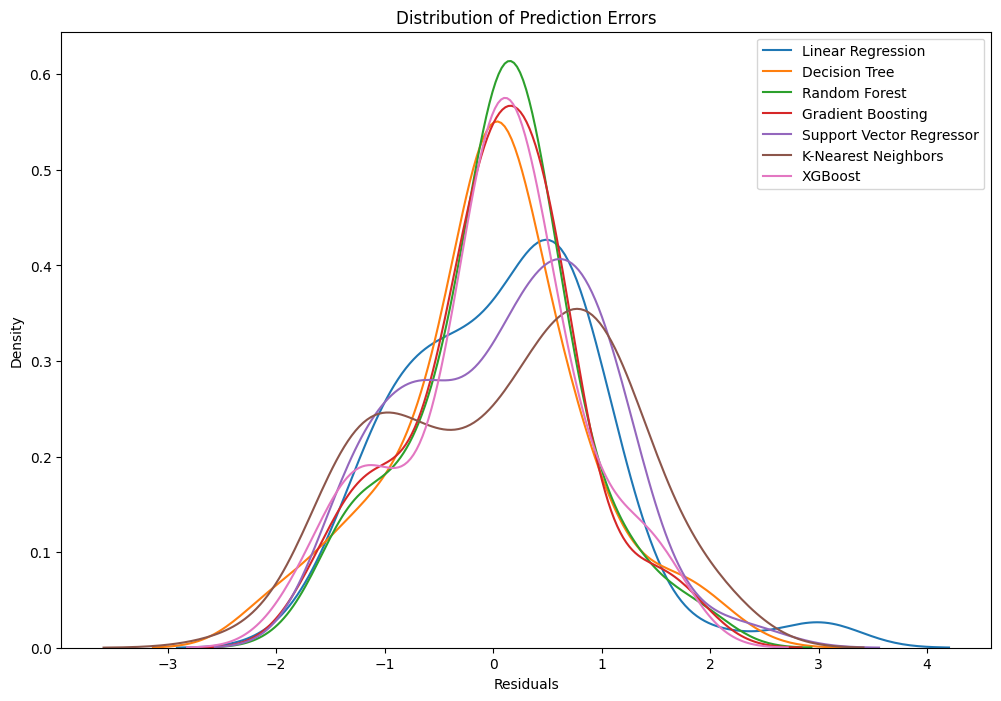

In [ ]:
# Predict on the test set using all models and compare error distributions
predictions = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    predictions[name] = y_test - y_pred

# Plot the distribution of residuals for each model
plt.figure(figsize=(12, 8))

for name, residuals in predictions.items():
    sns.kdeplot(residuals, label=name)

plt.title('Distribution of Prediction Errors')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


# Remove unnecessary columns (such as 'OrderDate', 'ProductName', etc.)
columns_to_remove = ['EmployeeName', 'EmployeeEmail', 'EmployeeHireDate',
                     'EmployeeJobTitle', 'CategoryName', 'ProductName',
                     'ProductDescription', 'CustomerName', 'CustomerAddress',
                     'CustomerEmail', 'OrderDate']

data = data.drop(columns=columns_to_remove, errors='ignore')

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Assume 'OrderItemQuantity' is the target variable for demand forecasting
target = 'OrderItemQuantity'

# Split data into features (X) and target (y)
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_state=42)
}

# Evaluate models using cross-validation
cv_results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_results[name] = np.sqrt(-cv_scores)

# Convert to DataFrame
cv_df = pd.DataFrame(cv_results)

# Display cross-validation scores
print(cv_df)


   Linear Regression  Decision Tree  Random Forest  Gradient Boosting  \
0       6.325081e+11       1.099129       0.644635           0.724724   
1       1.102074e+11       1.110240       0.954707           0.983142   
2       3.242358e+11       0.715617       0.631895           0.687355   
3       1.694112e+10       0.813961       0.574860           0.609114   
4       3.529342e+11       1.271602       1.068948           1.072278   

   Support Vector Regressor  K-Nearest Neighbors   XGBoost  
0                  0.843008             0.944545  0.794033  
1                  0.926965             0.923574  0.979551  
2                  0.908988             1.069448  0.678542  
3                  0.825637             0.944392  0.698922  
4                  0.936533             0.994968  1.124287  


**FORECASTING**

In [ ]:
print(data.columns)

Index(['RegionName', 'CountryName', 'State', 'City', 'PostalCode',
       'WarehouseAddress', 'WarehouseName', 'EmployeePhone',
       'ProductStandardCost', 'Profit', 'ProductListPrice',
       'CustomerCreditLimit', 'CustomerPhone', 'Status', 'OrderItemQuantity',
       'PerUnitPrice', 'TotalItemQuantity', 'TotalSales',
       'CostPriceInteraction'],
      dtype='object')


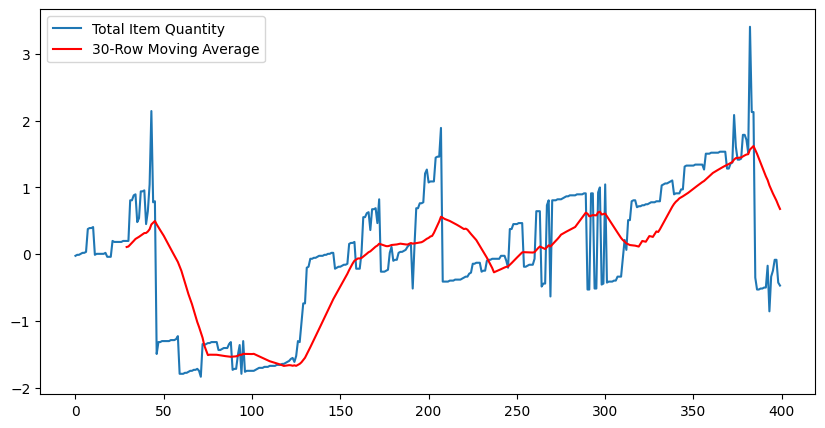

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the moving average of 'TotalItemQuantity' over a window of 30 rows
data['MA_30'] = data['TotalItemQuantity'].rolling(window=30).mean()

# Plot the moving average
plt.figure(figsize=(10, 5))
plt.plot(data['TotalItemQuantity'], label='Total Item Quantity')
plt.plot(data['MA_30'], label='30-Row Moving Average', color='red')
plt.legend()
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA on 'RegionName' for 'TotalItemQuantity'
model = ols('TotalItemQuantity ~ C(RegionName)', data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame
print(anova_results)


                   sum_sq     df          F        PR(>F)
C(RegionName)  162.409472    4.0  67.502419  1.693964e-43
Residual       237.590528  395.0        NaN           NaN


In [ ]:
import pandas as pd
from datetime import timedelta



# Create a synthetic 'OrderDate' starting from January 1, 2020
start_date = pd.to_datetime('2020-01-01')
data['SyntheticDate'] = [start_date + timedelta(days=x) for x in range(len(data))]

# Set this new date as the index
data.set_index('SyntheticDate', inplace=True)

# Resample data by day if needed, and use 'TotalItemQuantity' for time-series analysis
daily_quantity = data['TotalItemQuantity'].resample('D').sum().fillna(0)


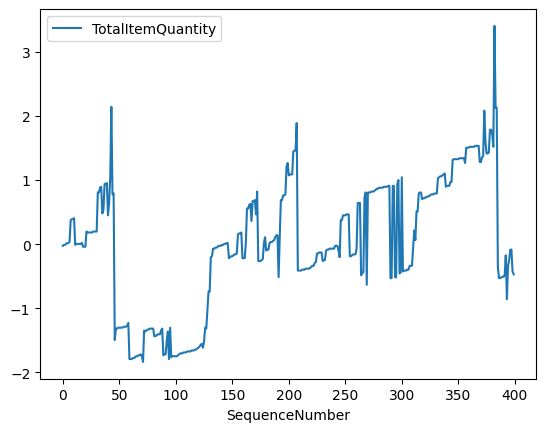

In [ ]:
# Assume a column 'SequenceNumber' represents time
data['SequenceNumber'] = range(len(data))  # If not present, create a sequence number

# Plotting or simple linear regression could be used to analyze trends
data.plot(x='SequenceNumber', y='TotalItemQuantity', kind='line')
plt.show()


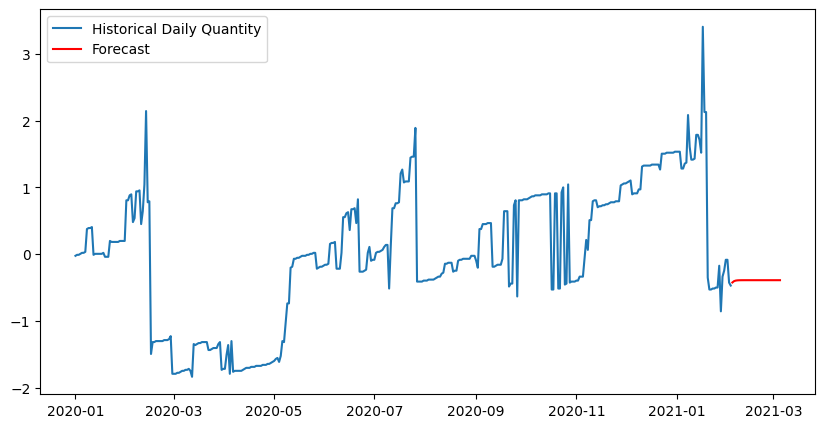

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Using the daily_quantity from the synthetic date example:
model = ARIMA(daily_quantity, order=(1,1,1))
fitted_model = model.fit()

# Forecast
forecast = fitted_model.forecast(steps=30)  # Forecast the next 30 days
plt.figure(figsize=(10, 5))
plt.plot(daily_quantity, label='Historical Daily Quantity')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()


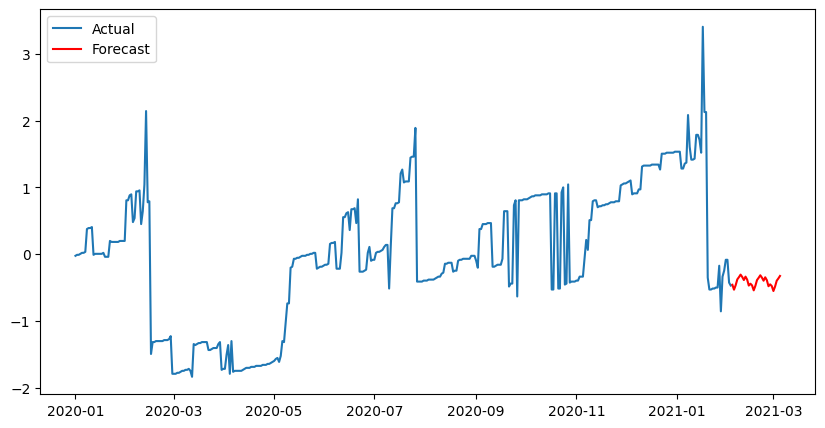

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'daily_quantity' from the synthetic date example
model = ExponentialSmoothing(daily_quantity, trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()

# Forecast
forecast = fitted_model.forecast(steps=30)
plt.figure(figsize=(10, 5))
plt.plot(daily_quantity, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()


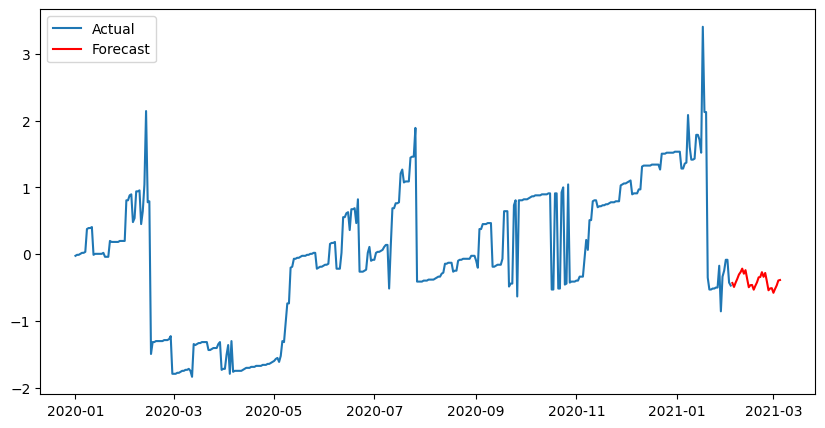

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(daily_quantity, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust these orders based on your data
fitted_model = model.fit()

# Forecast
forecast = fitted_model.forecast(steps=30)
plt.figure(figsize=(10, 5))
plt.plot(daily_quantity, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7jr0jb9b/k7g7301m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7jr0jb9b/bgle4y4y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49604', 'data', 'file=/tmp/tmp7jr0jb9b/k7g7301m.json', 'init=/tmp/tmp7jr0jb9b/bgle4y4y.json', 'output', 'file=/tmp/tmp7jr0jb9b/prophet_modelx19h0_t2/prophet_model-20240704102119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:21:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:21:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


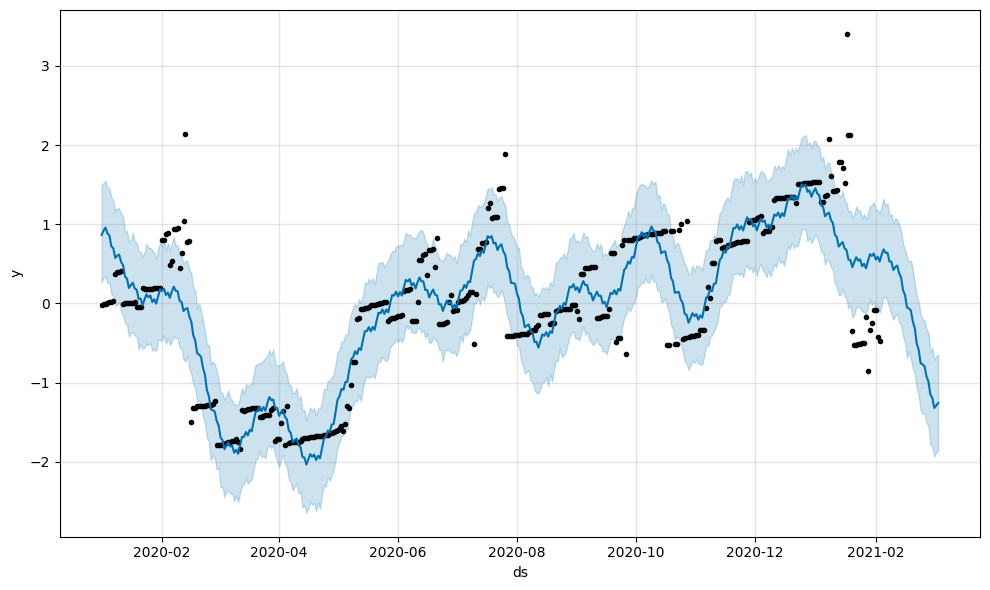

In [ ]:
from prophet import Prophet

# Convert to DataFrame suitable for Prophet
df_prophet = daily_quantity.reset_index()
df_prophet.columns = ['ds', 'y']

# Fit model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(df_prophet)

# Make a future dataframe for forecasting
future = model.make_future_dataframe(periods=30)

# Predict
forecast = model.predict(future)
model.plot(forecast)
plt.show()
